# Step 1: Install and Import Seaborn

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a built-in dataset
df = sns.load_dataset('iris')

# Display the first few rows
print(df.head())

# Overview of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


**sns.load_dataset():** loads a sample dataset as a Pandas DataFrame.
<br>
**df.head():** displays the first five rows to help you understand the structure.
<br>
**df.info():** shows column names, data types, and non-null counts.
<br>
**df.isnull().sum():** identifies missing values in each column.

---

# Step 2: Univariate Analysis
Univariate analysis focuses on understanding individual features in your dataset. It helps you examine their distributions and identify any anomalies or trends. In Seaborn, we use specific plot types to visualize categorical and continuous features.<br>

## Visualizing Continuous Variables
Continuous variables are numeric values that can take on a wide range of values (e.g., height, age, or temperature).

## 1.Histogram
Use **sns.histplot()** to plot a histogram:

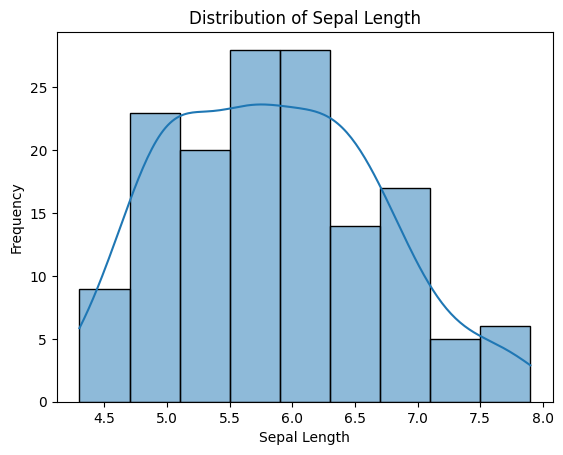

In [4]:
sns.histplot(df['sepal_length'], kde=True)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()

**kde=True** adds a smooth line to visualize the probability density.
### Customization:
You can adjust the number of bins and colors:

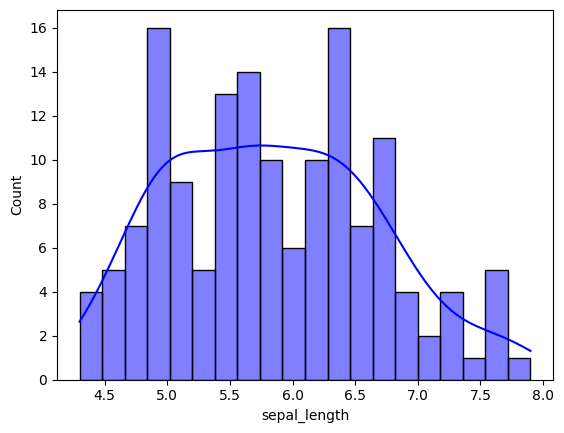

In [5]:
sns.histplot(df['sepal_length'], kde=True, bins=20, color='blue')
plt.show()

## 2.Box Plot
A boxplot is a statistical visualization tool that shows the distribution of a dataset through five key summary statistics. It is especially useful for identifying outliers, understanding spread, and comparing distributions across groups:

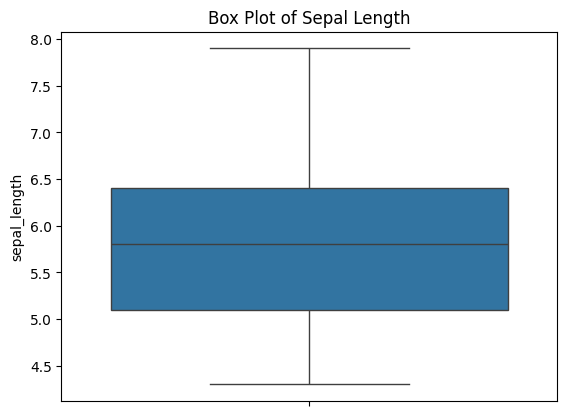

In [7]:
sns.boxplot(y='sepal_length', data=df)
plt.title('Box Plot of Sepal Length')
plt.show()

### Key Elements of a Boxplot
#### 1.Box:
Represents the interquartile range (IQR), which is the middle 50% of the data.
<br>The lower boundary of the box: 25th percentile (Q1).
<br>The upper boundary of the box: 75th percentile (Q3).
### 2.Line Inside the Box (Median):
Represents the 50th percentile (median).
<br>This is the midpoint of the data, splitting it into two equal halves.
### 3.Whiskers:
Extend from the box to show the range of data within 1.5 times the IQR from Q1 and Q3.
<br>Lower whisker: Smallest value within this range.
<br>Upper whisker: Largest value within this range.
### 4.Outliers (Dots):
Points outside the whiskers are outliers, which are unusually high or low values.
<br>Outliers are calculated as values below $$Q1-1.5*IQR$$ or above $$Q3+1.5*IQR$$

### Boxplot Grouped by Categories
Compare distributions across a categorical variable:

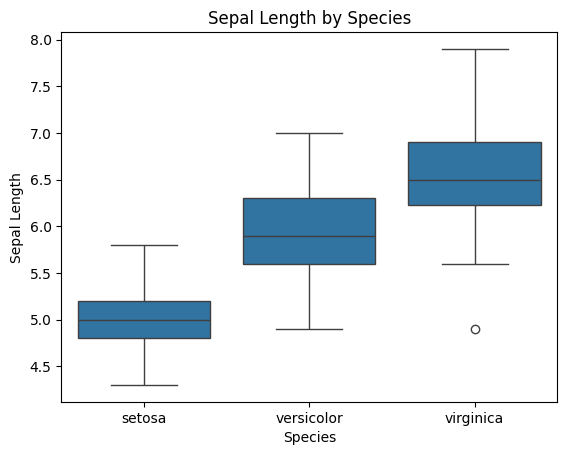

In [9]:
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

The x-axis represents the categories (species).
<br>The y-axis shows the distribution of sepal_length for each category.

### Analyzing a Boxplot
#### Shape of Distribution:
If the median line is closer to the bottom of the box, the data is positively skewed.
<br>If it’s closer to the top, the data is negatively skewed.
<br>If it’s in the center, the distribution is roughly symmetrical.
#### Spread of the Data:
A wider box indicates more variability in the middle 50% of the data.
<br>Longer whiskers suggest a broader overall range.
#### Outliers:
Look for dots beyond the whiskers. They represent values that differ significantly from the rest of the dataset.
<br>Outliers might need special attention, as they can skew analysis or indicate measurement errors.

### Customizing a Boxplot
#### 1.Change Colors:

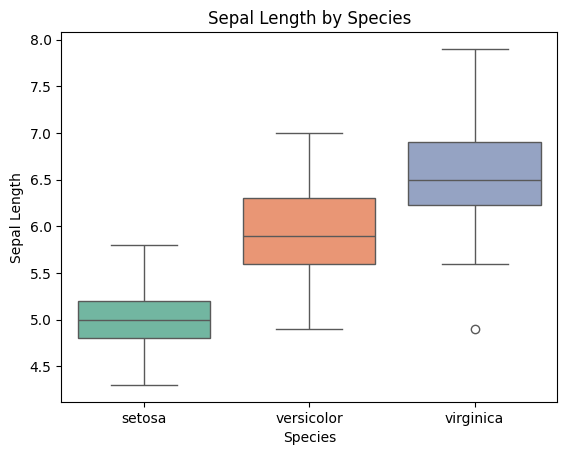

In [11]:
sns.boxplot(x='species', y='sepal_length', data=df, hue='species', palette='Set2', legend=False)
plt.title('Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

**hue='species':** This tells Seaborn to color the boxes based on the different species.
<br>**legend=False:** This suppresses the legend, as it is no longer necessary when hue is assigned, since the hue already distinguishes the colors.

#### 2.Add Swarmplot (Combine with Another Plot):
Show individual data points on top of a boxplot:

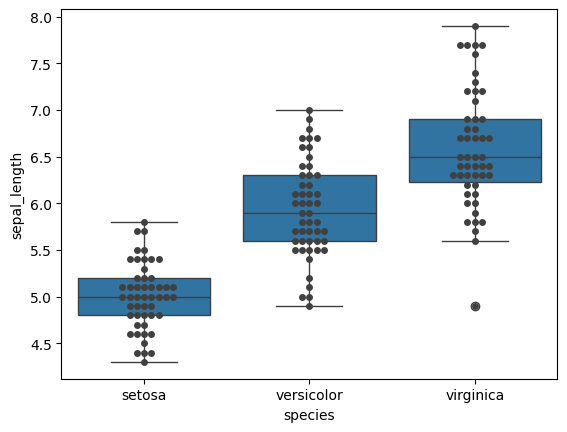

In [12]:
sns.boxplot(x='species', y='sepal_length', data=df)
sns.swarmplot(x='species', y='sepal_length', data=df, color='.25')
plt.show()

#### 3.Horizontal Orientation:

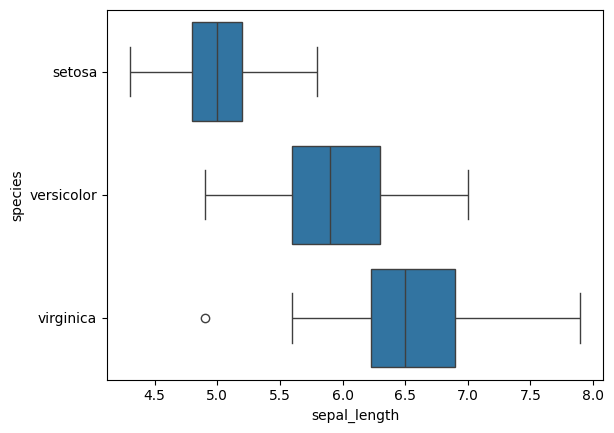

In [13]:
sns.boxplot(x='sepal_length', y='species', data=df)
plt.show()

### When to Use Boxplots
- To summarize distributions of a feature.
- To compare distributions across categories.
- To detect outliers in your data.
- To check the spread and symmetry of features for preprocessing tasks like scaling.

## Visualizing Categorical Variables
Categorical variables contain discrete categories or labels (e.g., species, gender).

### 1.Count Plot
A count plot shows the frequency of each category:

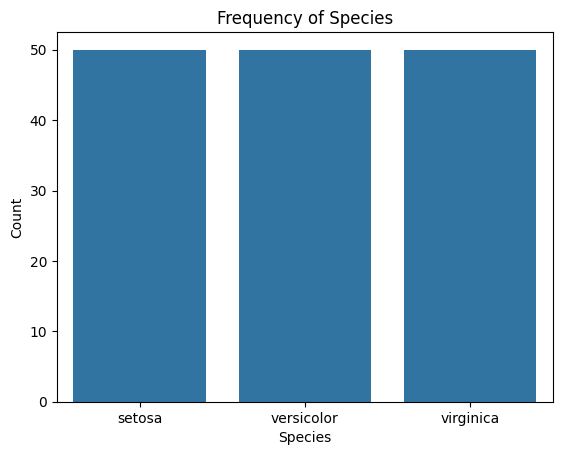

In [14]:
sns.countplot(x='species', data=df)
plt.title('Frequency of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

### 2.Bar Plot
For categorical variables with an associated numeric value (e.g., average sepal length per species), use **sns.barplot()**:

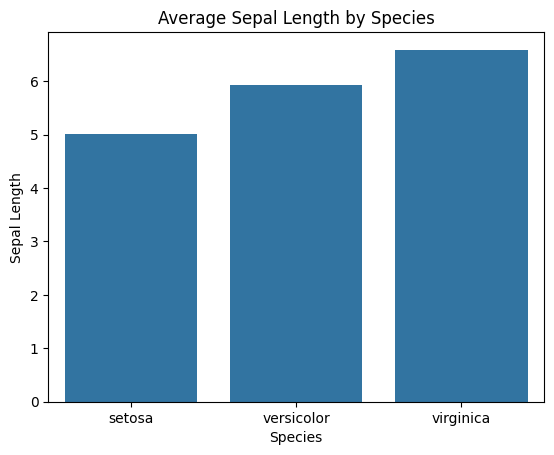

In [16]:
sns.barplot(x='species', y='sepal_length', data=df, errorbar=None)
plt.title('Average Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

**errorbar=None:** This removes the confidence interval and plots only the mean of the sepal_length for each species.

---

# Step 3: Bivariate Analysis
Bivariate analysis involves examining the relationship between two variables. In machine learning, it's important to understand how features relate to each other, as this can guide feature engineering and model selection. Seaborn provides several visualization tools for comparing two variables, including scatter plots, box plots, and pair plots.

## 1. Scatter Plot (For Two Continuous Variables)
A **scatter plot** is a great way to examine the relationship between two continuous variables. It shows individual data points plotted on the x- and y-axes, which helps in identifying patterns, trends, and correlations.

### Creating a Basic Scatter Plot
To visualize the relationship between two continuous variables, use **sns.scatterplot()**:

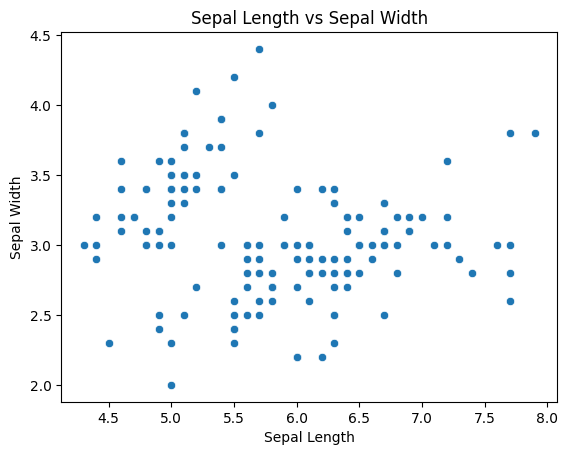

In [17]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=df)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

### Scatter Plot with Hue (Categorical Variable)
You can color the points based on a categorical variable (e.g., species) using the hue parameter:

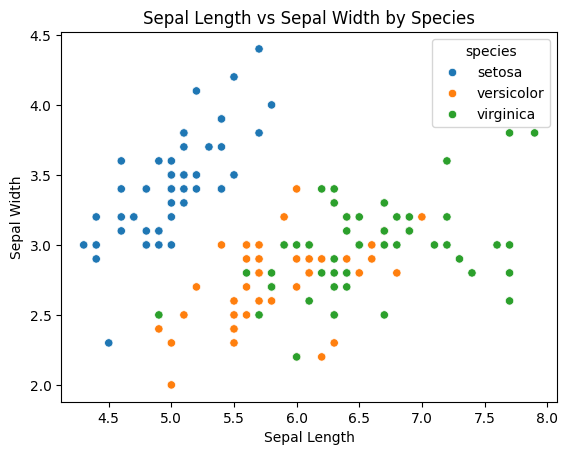

In [18]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.title('Sepal Length vs Sepal Width by Species')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

**hue='species':** This colors the data points based on species.

### 2. Box Plot for Categorical vs Continuous Variables
A box plot can be used to compare the distribution of a continuous variable across different categories (e.g., comparing sepal_length between different species).

#### Creating a Boxplot

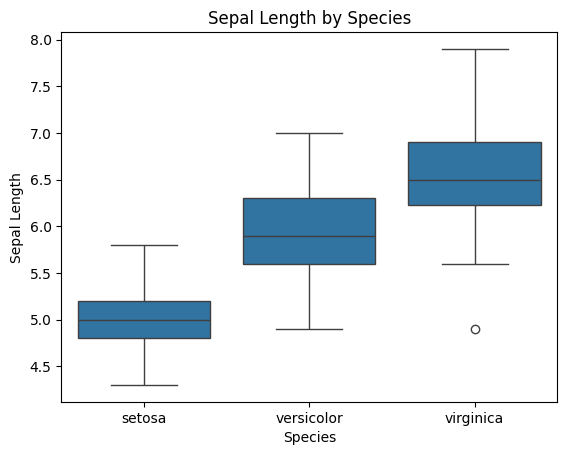

In [19]:
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

**Explanation of Boxplot in Bivariate Analysis**
- The box represents the interquartile range (IQR), showing where the middle 50% of data points fall.
- The whiskers extend to 1.5 times the IQR.
- The outliers are points beyond the whiskers.
- The median line inside the box indicates the middle value.

### 3. Pairplot (For Multiple Continuous Variables)
A pairplot allows you to visualize the relationships between all pairs of continuous variables in your dataset. It is especially useful when you want to see how multiple features interact with each other.

#### Creating a Pairplot

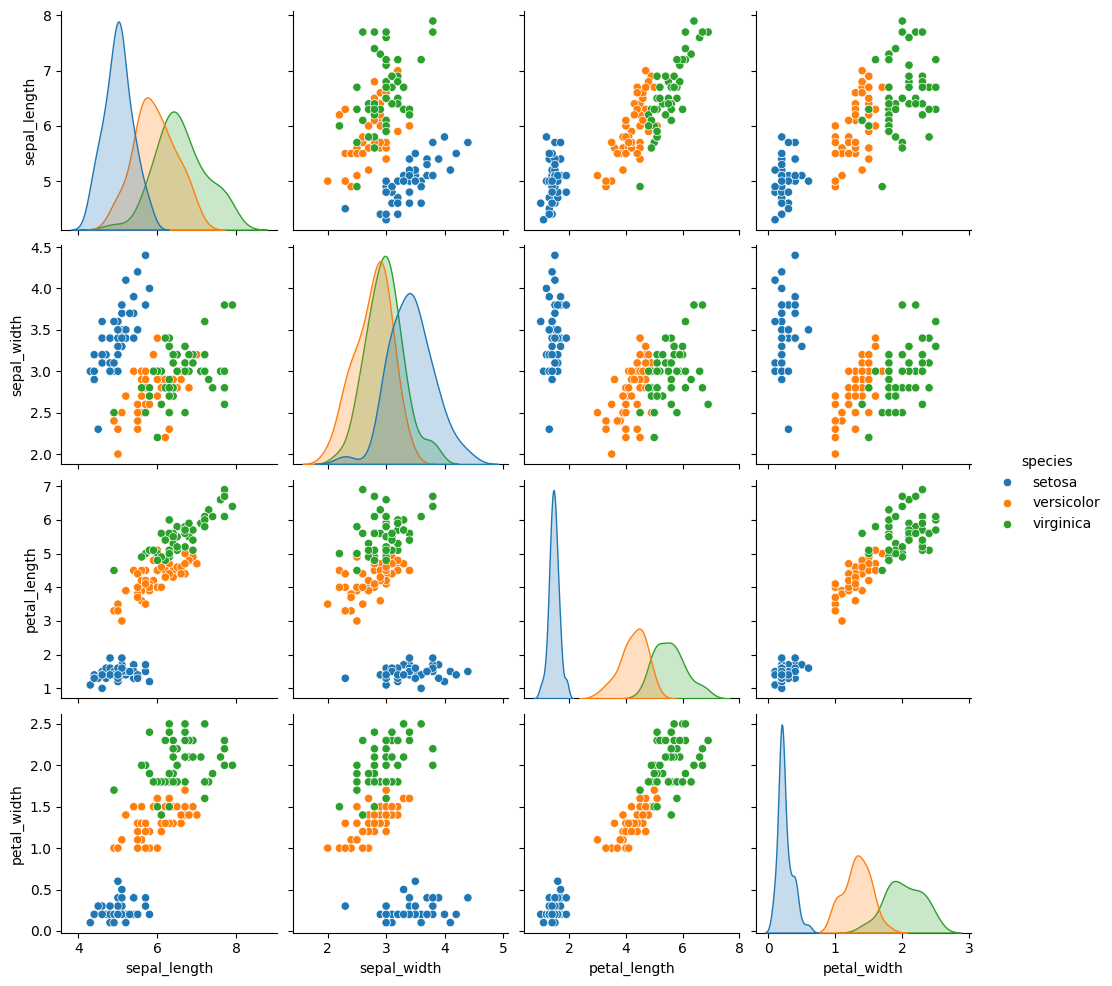

In [20]:
sns.pairplot(df, hue='species')
plt.show()

- This will generate scatter plots for every pair of variables in the dataset, along with histograms for each individual variable.
- **hue='species'** colors the points according to the species, making it easier to compare groups across multiple dimensions.

### 4. Heatmap of Correlation Matrix
A heatmap can be used to visualize correlations between continuous variables. This is useful when you want to identify highly correlated features (which may affect your machine learning model's performance).

#### Creating a Heatmap of the Correlation Matrix

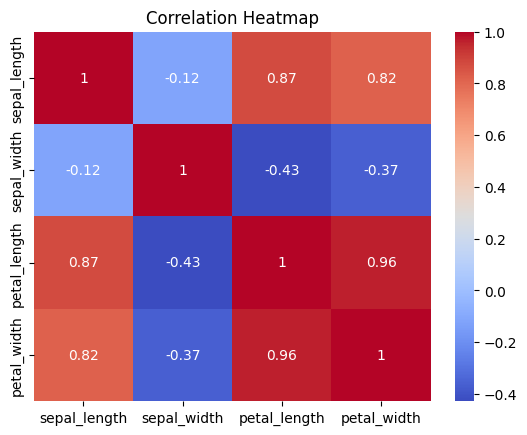

In [22]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- **df.select_dtypes(include=['float64', 'int64']):** This filters the DataFrame to include only columns with numeric data types (float64 and int64).
- **correlation_matrix = numeric_df.corr():** Computes the correlation matrix only for numeric columns.
- **sns.heatmap():** Plots the correlation matrix.
- The heatmap displays the correlation values, where dark colors represent high correlations and lighter colors indicate weak correlations.

### 5. Violin Plot for Comparing Distributions
A violin plot combines aspects of both a boxplot and a kernel density estimate (KDE) to provide a deeper understanding of the distribution of the data. It's useful for comparing the distribution of a continuous variable across categories.

#### Creating a Violin Plot

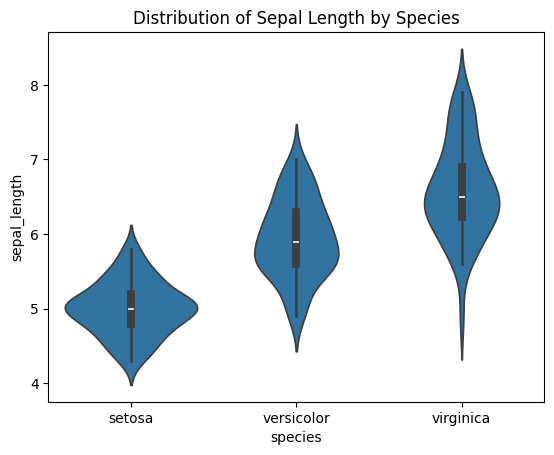

In [23]:
sns.violinplot(x='species', y='sepal_length', data=df)
plt.title('Distribution of Sepal Length by Species')
plt.show()

The **violin shape** shows the density of the data at different values. The wider sections indicate higher concentrations of data points.

### Summary of Bivariate Analysis
- **Scatter plots** show relationships between two continuous variables.
- **Box plots** help compare the distribution of a continuous variable across categories.
- **Pair plots** are useful for visualizing relationships between multiple continuous variables.
- **Heatmaps** help you explore correlations between features.
- **Violin plots** combine the benefits of box plots and KDEs to show data distributions.
---

# Step 4: Multivariate Analysis
Multivariate analysis involves exploring relationships between three or more variables. In machine learning, understanding how multiple features interact simultaneously can guide you in selecting the right features and creating new ones. Seaborn provides powerful tools for visualizing these relationships, helping you understand how different features correlate or interact in complex ways.

## 1. Pairplot (For Multiple Continuous Variables)
A pairplot is a great way to visualize interactions between multiple continuous variables. It creates scatter plots for all pairs of variables and histograms for each individual variable, which helps you spot correlations and trends.

### Creating a Pairplot

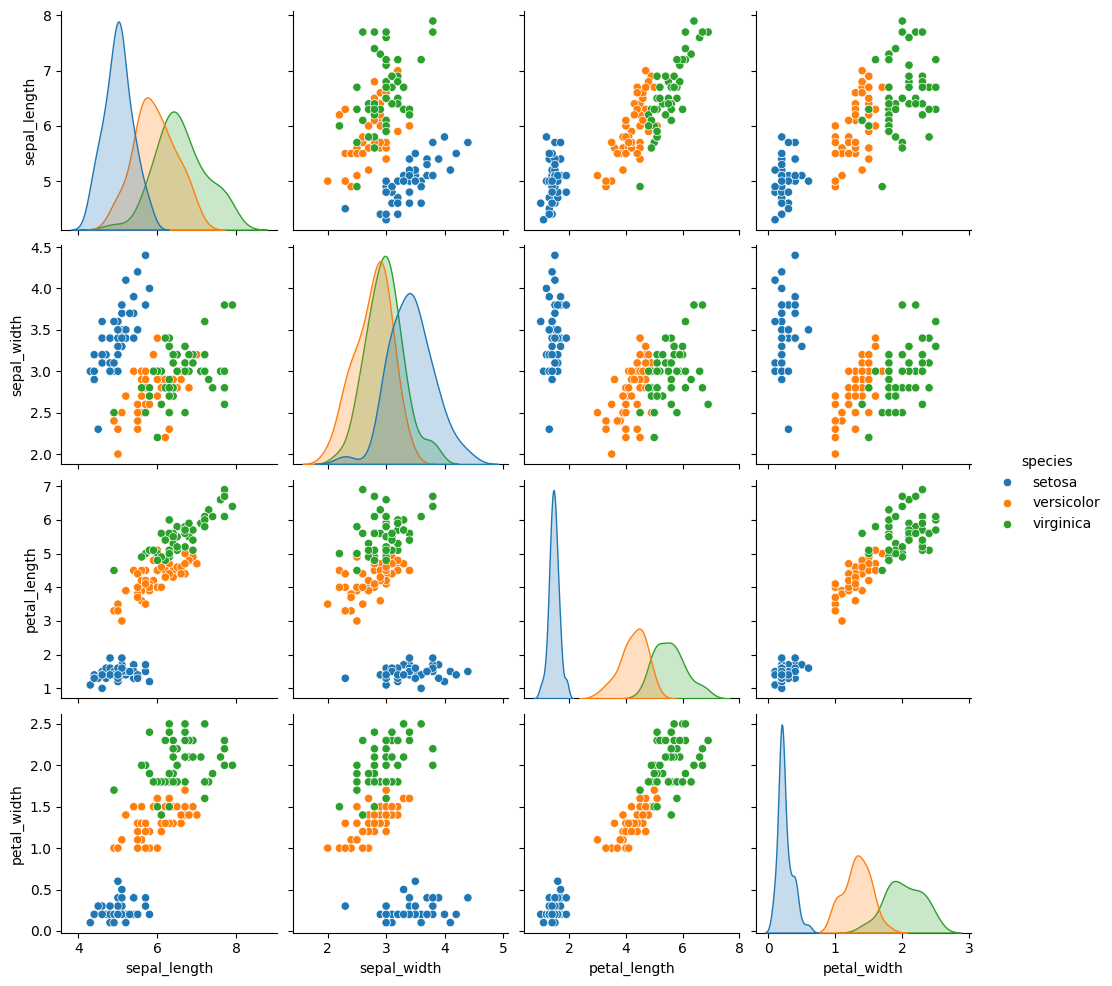

In [24]:
sns.pairplot(df, hue='species')
plt.show()

## 2. Heatmap for Multivariate Correlations
While a single correlation matrix heatmap only shows pairwise correlations, you can extend this idea to more complex scenarios involving multiple variables.
<br>If you want to visualize relationships between three or more variables, you can still use a heatmap for correlation or covariance matrices, especially for higher-dimensional data.
<br>For example, a pairwise correlation heatmap is particularly useful for multivariate analysis:

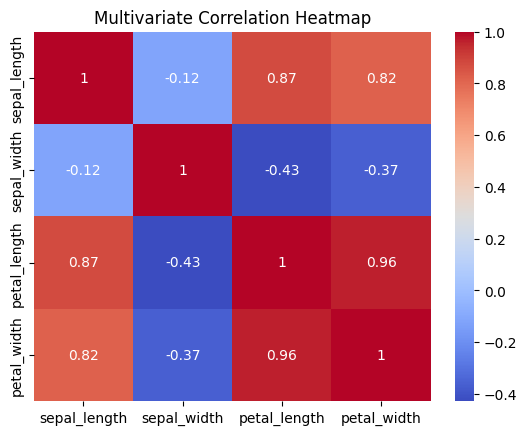

In [25]:
# For numerical columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Multivariate Correlation Heatmap')
plt.show()

## 3. 3D Scatter Plot (For Three Continuous Variables)
For three continuous variables, you can create a **3D scatter plot** using Matplotlib or other libraries like Plotly. Seaborn does not directly support 3D scatter plots, but you can use **Axes3D** in Matplotlib to visualize three-dimensional data.

### Creating a 3D Scatter Plot

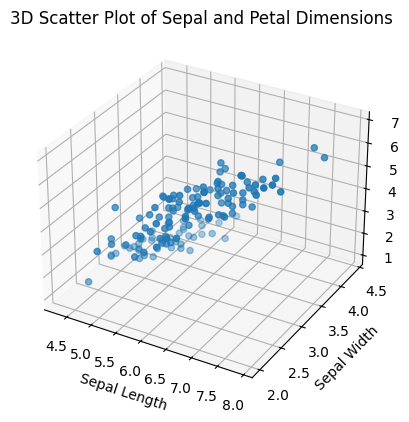

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Extract 3 continuous variables
x = df['sepal_length']
y = df['sepal_width']
z = df['petal_length']

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Labels and title
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Sepal and Petal Dimensions')

plt.show()

- This plots sepal_length, sepal_width, and petal_length in 3D space, helping you understand how three variables interact in a three-dimensional space.

## 4. FacetGrid for Visualizing Multivariate Data
A FacetGrid allows you to visualize a grid of plots, where each plot corresponds to a subset of the data. This is useful when you want to visualize how a variable behaves with different subsets, such as different categories of a categorical variable.

### Creating a FacetGrid

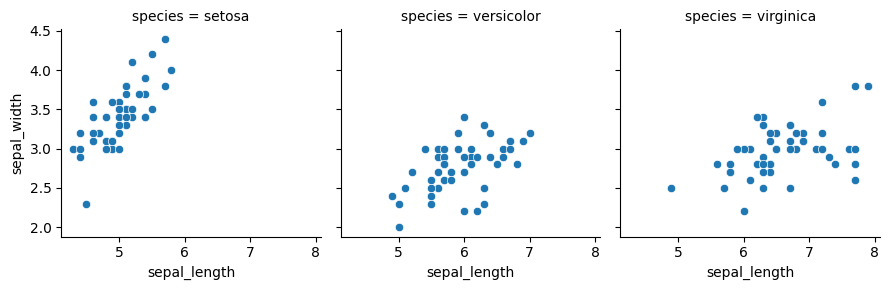

In [27]:
g = sns.FacetGrid(df, col='species')
g.map(sns.scatterplot, 'sepal_length', 'sepal_width')
plt.show()

- FacetGrid: Creates a grid of plots, with each plot showing the relationship between sepal_length and sepal_width for a different species.
- col='species': Creates a separate plot for each category in the species column.

This is a great way to compare distributions and relationships across different categories.

## 5. Violin Plot for Multivariate Comparison
If you want to compare a continuous variable across multiple categorical variables, a violin plot is a good choice. It combines the features of boxplots and KDEs (kernel density estimates) to show distributions across categories.

### Creating a Violin Plot

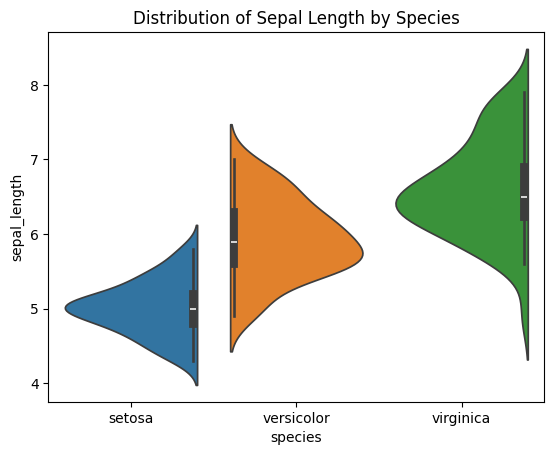

In [28]:
sns.violinplot(x='species', y='sepal_length', data=df, hue='species', split=True)
plt.title('Distribution of Sepal Length by Species')
plt.show()

- **split=True:** Splits the violins for different categories within each species, allowing you to compare distributions across categories.
- **hue='species':** Colors the violins based on the *species* column.

## 6. Parallel Coordinates Plot (For Multivariate Continuous Data)
A parallel coordinates plot is a way to visualize high-dimensional data. It can show how data points with multiple features are distributed across different categories.

This plot is not available in Seaborn directly, but you can use libraries like **pandas.plotting** or **Plotly** for this.

## Summary of Multivariate Analysis:
- **Pairplots:** Show relationships between multiple continuous variables.
- **Correlation heatmaps:** Visualize pairwise correlations between features.
- **3D scatter plots:** Useful for visualizing three continuous variables.
- **FacetGrid:** Visualize subsets of data across categories.
- **Violin plots:** Show distributions of continuous variables across categories.
- **Parallel coordinates plots:** Visualize multivariate data in higher dimensions.
---

# Step 5: Statistical Analysis and Model Evaluation
This step focuses on assessing data patterns, distributions, and model performance.

## 1. Linear Regression Visualization
Seaborn provides tools to visualize linear relationships between variables and assess how well they align.

### Regression Plot
A regression plot (**sns.regplot()**) shows the linear relationship between two variables along with a regression line.

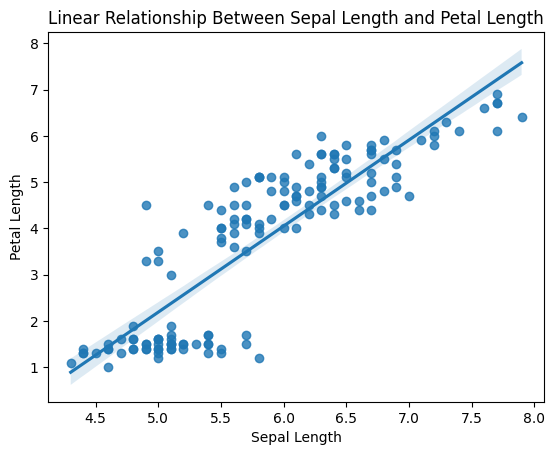

In [29]:
sns.regplot(x='sepal_length', y='petal_length', data=df)
plt.title('Linear Relationship Between Sepal Length and Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

- **What it shows:** The scatter plot of data points and a fitted linear regression line.
- **Use case:** Detecting linear relationships between features.

### Lmplot (Adding Categories)
If you want to analyze regression relationships across categories, use **sns.lmplot()** with the hue parameter.

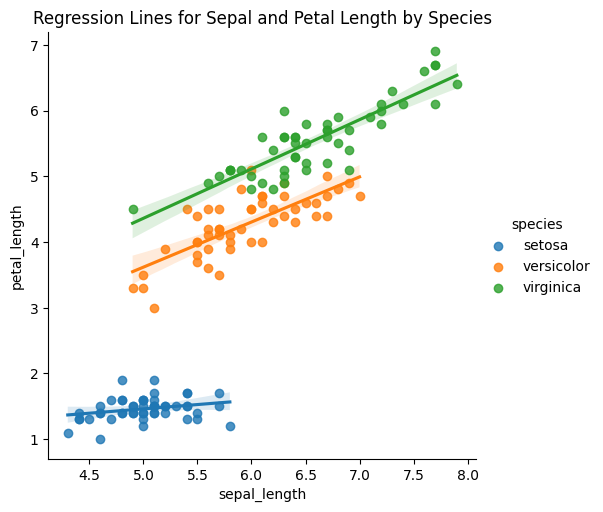

In [4]:
sns.lmplot(x='sepal_length', y='petal_length', hue='species', data=df)
plt.title('Regression Lines for Sepal and Petal Length by Species')
plt.show()

- **hue='species':** Creates separate regression lines for each species.

## 2. Residual Plot
Residual plots help you assess the fit of a regression model by showing the differences between observed and predicted values.

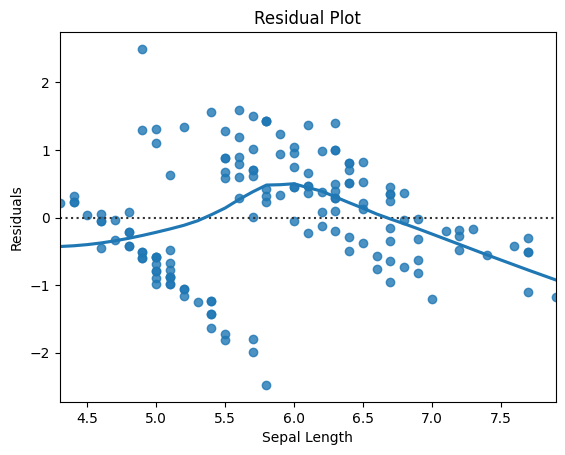

In [5]:
sns.residplot(x='sepal_length', y='petal_length', data=df, lowess=True)
plt.title('Residual Plot')
plt.xlabel('Sepal Length')
plt.ylabel('Residuals')
plt.show()

- **What it shows:** A plot of residuals (errors) against the predictor variable.
- **Use case:** Check if residuals are randomly distributed, indicating a good model fit.
- The smoothed curve helps you see if residuals consistently deviate from zero.
- If the curve is mostly flat and close to 0, it suggests a good model fit.


### What LOWESS Does?
- **Local Regression:** Instead of fitting a single global line (like linear regression), LOWESS fits a regression line to a subset of the data around each point (local neighborhood).
- **Weighted Fit:** Points closer to the target point are given more weight in the regression fit, and points further away are given less weight.
- **Non-Parametric:** LOWESS does not assume a particular functional form for the relationship between variables, making it very flexible for capturing complex, non-linear patterns.

### Use of LOWESS in Residual Plots
When you use **lowess=True** in a residual plot, it:
- Smooths the residuals to visualize their trend across the range of the predictor variable.
- Helps detect patterns in residuals that may indicate:
>- **Non-linearity:** If the residuals curve systematically above or below 0, the model might not be capturing all trends in the data.
>- **Heteroscedasticity:** If the spread of residuals changes (e.g., gets wider) across the range, it might indicate issues with variance.
>- **Outliers:** Residuals far from the smoothed line might indicate outliers.

## When to Use LOWESS
- When you suspect non-linear relationships in your data.
- To visually assess the fit of your model and identify patterns in residuals.
- To ensure residuals are randomly distributed (a key assumption of linear regression).

## 3. Evaluating Model Performance
Seaborn can be used to plot results from machine learning models, such as confusion matrices, prediction distributions, and error analysis.

### Confusion Matrix Heatmap
If you're working on classification problems, a confusion matrix visualized with a heatmap can help evaluate model performance.

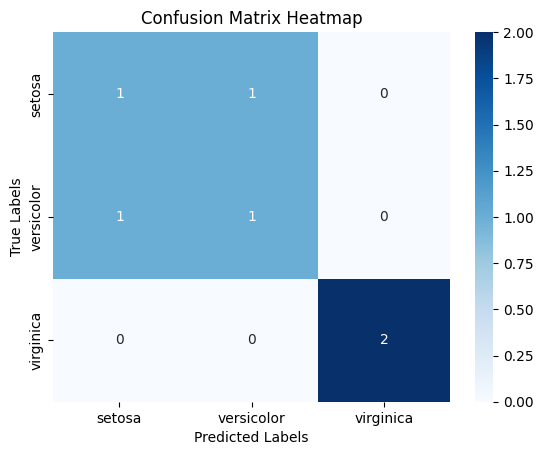

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example Confusion Matrix
y_true = ['setosa', 'setosa', 'virginica', 'versicolor', 'virginica', 'versicolor']
y_pred = ['setosa', 'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa']

cm = confusion_matrix(y_true, y_pred, labels=['setosa', 'versicolor', 'virginica'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

- **What it shows:** Counts of true positives, true negatives, false positives, and false negatives for each class.
- **Use case:** Evaluating classification accuracy.
- **The confusion_matrix function** computes a matrix comparing true labels (y_true) to predicted labels (y_pred).
- The **labels** parameter specifies the order of classes. Here, the order is ['setosa', 'versicolor', 'virginica'].
- **annot=True:** Annotates each cell with the numeric count from the confusion matrix.
- **fmt='d':** Formats the annotations as integers.
- **cmap='Blues':** Sets the color map to shades of blue for better visual appeal.
- **xticklabels** and **yticklabels:** Label the columns (predicted) and rows (true) with class names.


### What Is a Confusion Matrix?
A confusion matrix is a table that describes the performance of a classification model by showing the counts of:
1. True Positives (TP): Correctly predicted positive cases.
2. True Negatives (TN): Correctly predicted negative cases.
3. False Positives (FP): Incorrectly predicted positive cases.
4. False Negatives (FN): Incorrectly predicted negative cases.

**For multi-class classification:**
- Rows represent the true labels.
- Columns represent the predicted labels.

**Confusion Matrix Example**
The computed confusion matrix (cm) might look like this:

|True\Pred |setosa |versicolor |virginica|
|---|---|---|---|
|setosa	|1|1|0|
|versicolor |0|1|1|
|virginica	|0|0|2|

This table can be interpreted as:

Row 1 (setosa):

>1 sample was correctly classified as setosa.
<br>1 sample was misclassified as versicolor.

Row 2 (versicolor):

>1 sample was correctly classified as versicolor.
<br>1 sample was misclassified as virginica.

Row 3 (virginica):
>2 samples were correctly classified as virginica.

### Visualized Heatmap
The heatmap visually represents the confusion matrix:

- **Diagonal cells:** Correct predictions (e.g., setosa predicted as setosa).
- **Off-diagonal cells:** Misclassifications (e.g., setosa predicted as versicolor).

## 4. Distribution of Errors
For regression tasks, it's useful to visualize the distribution of errors (residuals) to ensure they are normally distributed.

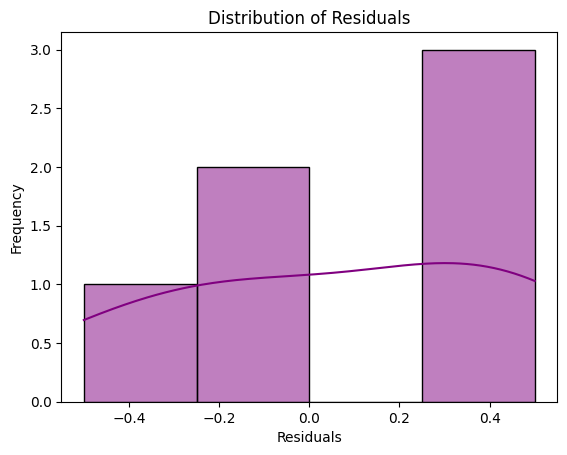

In [4]:
# Example residuals (replace with your model's residuals)
residuals = [0.5, -0.2, 0.3, -0.1, 0.4, -0.5]

sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

- **What it shows:** A histogram of residuals, often overlaid with a KDE curve.
- **Use case:** Checking the assumption of normally distributed errors.

## 5. Feature Importance Plot
If your machine learning model provides feature importance scores (e.g., random forest, XGBoost), you can visualize these scores to understand which features are most significant.

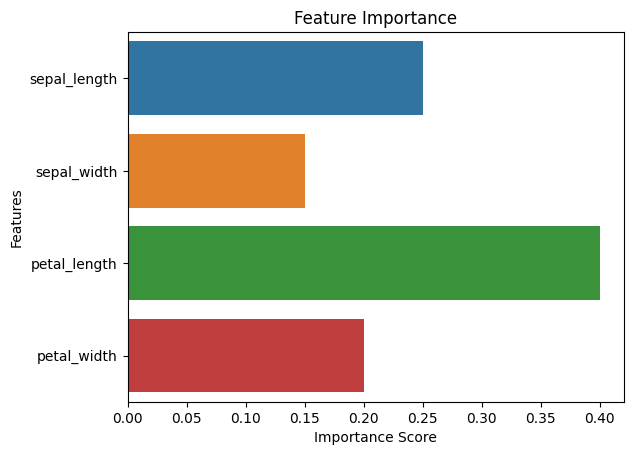

In [8]:
# Example feature importances
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
importances = [0.25, 0.15, 0.4, 0.2]

sns.barplot(x=importances, y=features, hue=features, legend=False)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

- **What it shows:** The relative importance of each feature in the model.
- **Use case:** Feature selection and understanding model behavior.

### Summary of Statistical Analysis and Model Evaluation
- **Regression plots:** Visualize linear relationships and model fits.
- **Residual plots:** Check the fit and randomness of residuals.
- **Confusion matrices:** Evaluate classification performance.
- **Error distributions:** Ensure residuals follow assumptions.
- **Feature importance plots:** Understand the contribution of each feature to the model.
---

# Step 6: Advanced Customizations and Applications of Pair Plot
Building on the basic pairplot, advanced customizations can help you tailor the visualization to focus on specific insights, especially in machine learning tasks. Here, we explore customization options and discuss applications for using the pair plot effectively.

## 1. Focus on Specific Features
Instead of including all features in the dataset, you can filter only relevant ones. This is useful for datasets with many features.

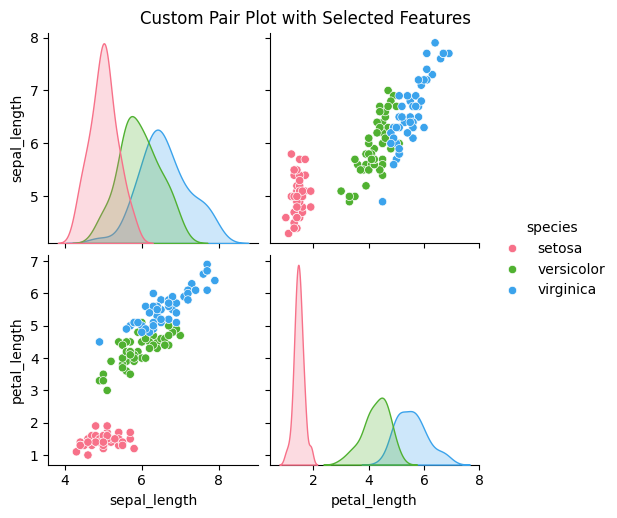

In [13]:
sns.pairplot(df[['sepal_length', 'petal_length', 'species']], hue='species', palette='husl')
plt.suptitle('Custom Pair Plot with Selected Features', y=1.02)
plt.show()

- **[['sepal_length', 'petal_length', 'species']]:** Selects specific features.
- **palette='husl':** Changes the color scheme for better distinction.

## 2. Add Regression Lines
Including regression lines in scatterplots can highlight trends between features.

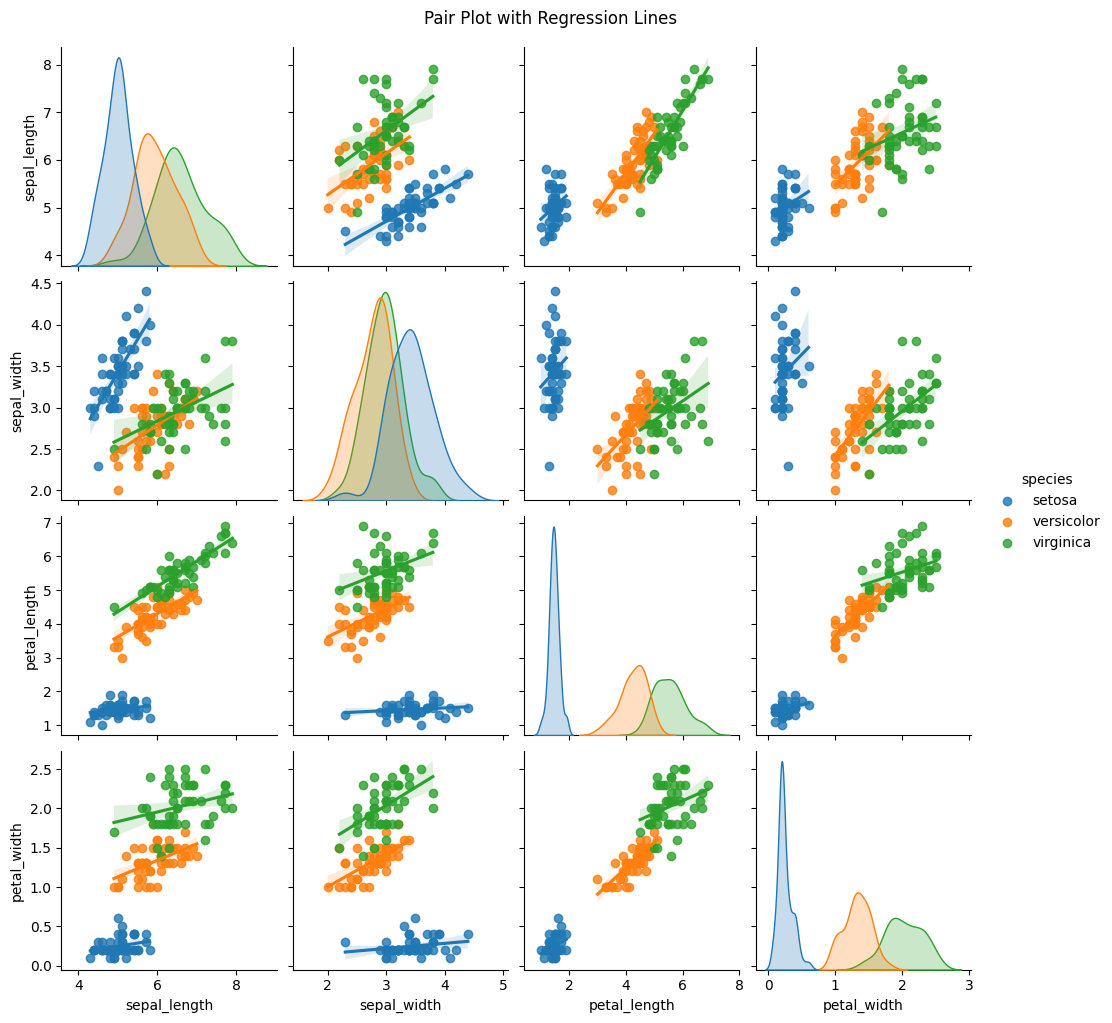

In [14]:
sns.pairplot(df, hue='species', kind='reg', diag_kind='kde')
plt.suptitle('Pair Plot with Regression Lines', y=1.02)
plt.show()

- **kind='reg':** Adds regression lines to scatterplots.
- **Application:** Identify linear relationships between features that might benefit linear models.
- **diag_kind='kde':** This will generate **KDE** plots along the diagonal for each feature (sepal_length, sepal_width, petal_length, petal_width), allowing you to see the smooth distribution of these features for each species.

**Kernel Density Estimation (KDE)**
- KDE is a non-parametric way to estimate the probability density of a continuous random variable. It smooths out the distribution of the data points, providing a clearer visualization of its shape compared to histograms.
- The KDE curve is particularly useful when you want to visualize the shape of the distribution and look for things like:
>- Skewness or symmetry.
>- Peaks (indicating modes in the data).
>- The spread of the data.

## 3. Customize Markers
Different markers can help distinguish data points, especially in cases of overlapping classes.

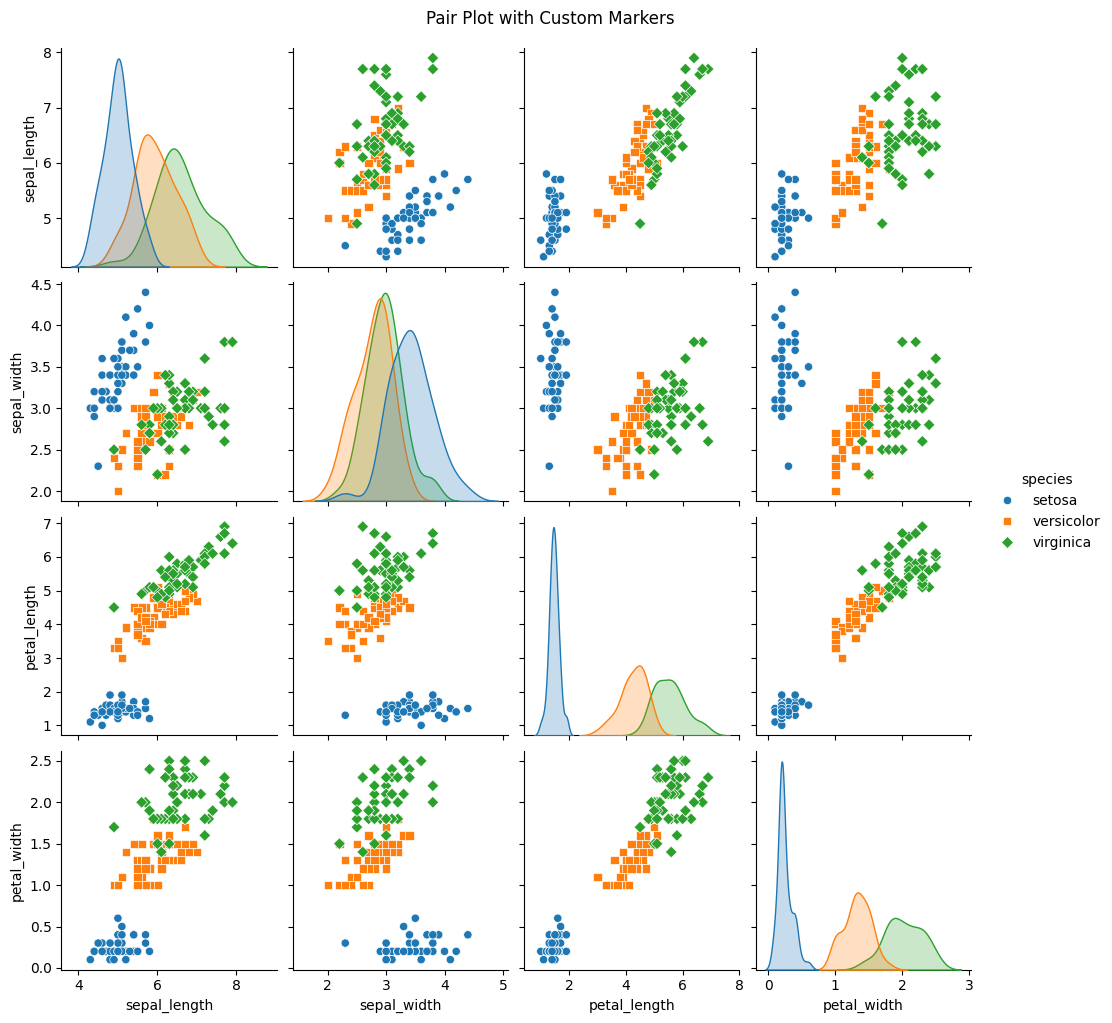

In [15]:
sns.pairplot(df, hue='species', diag_kind='kde', markers=['o', 's', 'D'])
plt.suptitle('Pair Plot with Custom Markers', y=1.02)
plt.show()

- **markers=['o', 's', 'D']:** Assigns specific markers to each class.

## 4. Use Larger Datasets
For datasets with more classes or features, you can adjust parameters like height and aspect to improve readability.

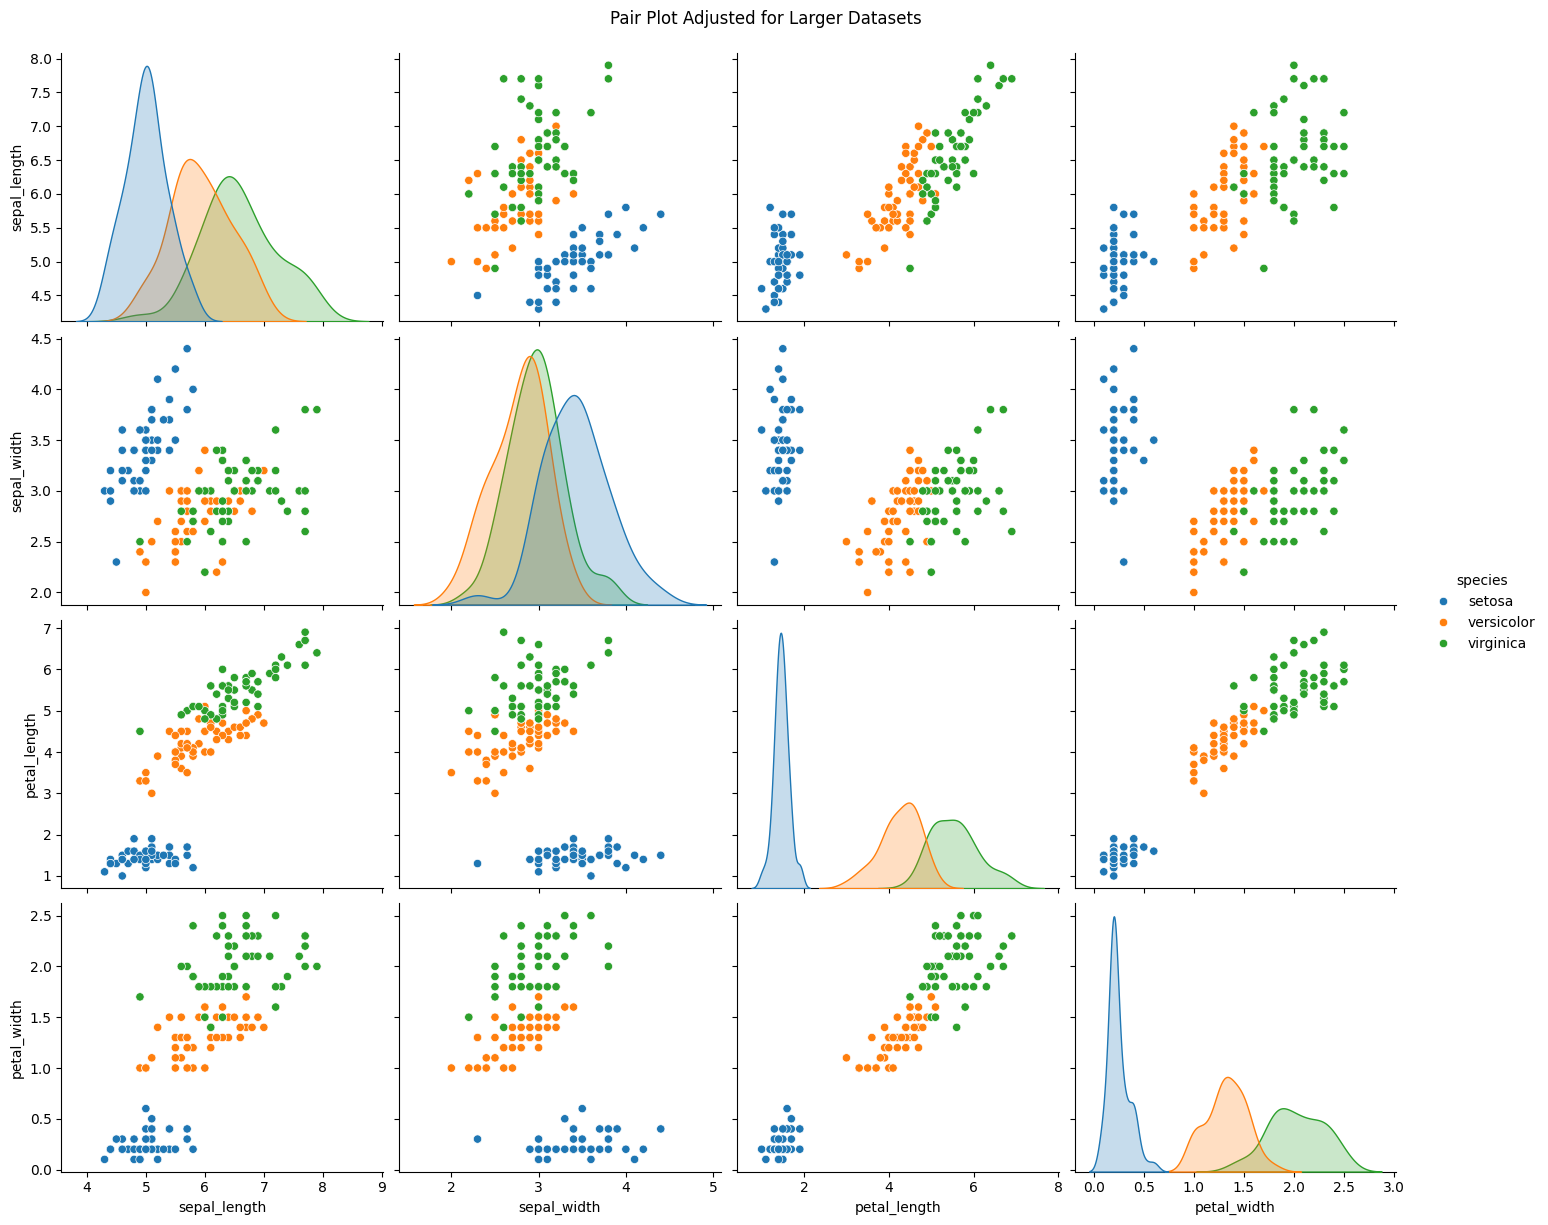

In [23]:
sns.pairplot(df, hue='species', diag_kind='kde', height=3, aspect=1.2)
plt.suptitle('Pair Plot Adjusted for Larger Datasets', y=1.02)
plt.show()

- **height=3:** Controls the size of each plot.
- **aspect=1.2:** Adjusts the aspect ratio for wider plots.

## 5. Visualizing Relationships in Complex Datasets
For datasets with many features, consider creating multiple pair plots for feature groups.

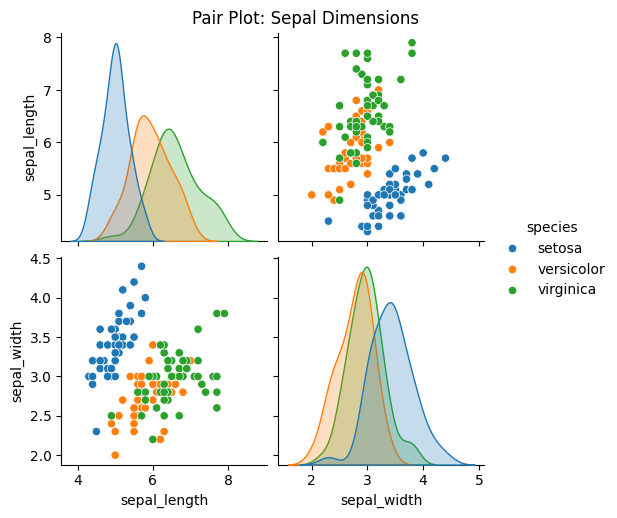

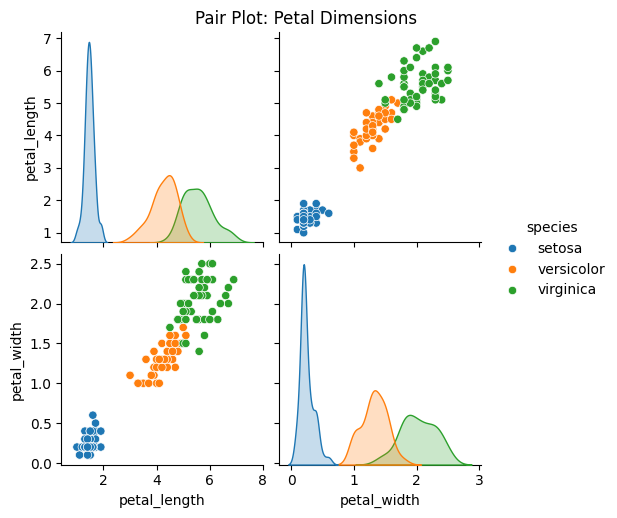

In [24]:
# Group 1: Sepal Dimensions
sns.pairplot(df[['sepal_length', 'sepal_width', 'species']], hue='species')
plt.suptitle('Pair Plot: Sepal Dimensions', y=1.02)

# Group 2: Petal Dimensions
sns.pairplot(df[['petal_length', 'petal_width', 'species']], hue='species')
plt.suptitle('Pair Plot: Petal Dimensions', y=1.02)
plt.show()

- **Application:** Analyze relationships within subsets of features.

## 6. Improve Aesthetics with Themes
Seaborn offers themes to improve plot aesthetics. Use themes like darkgrid or whitegrid to align with your presentation style.

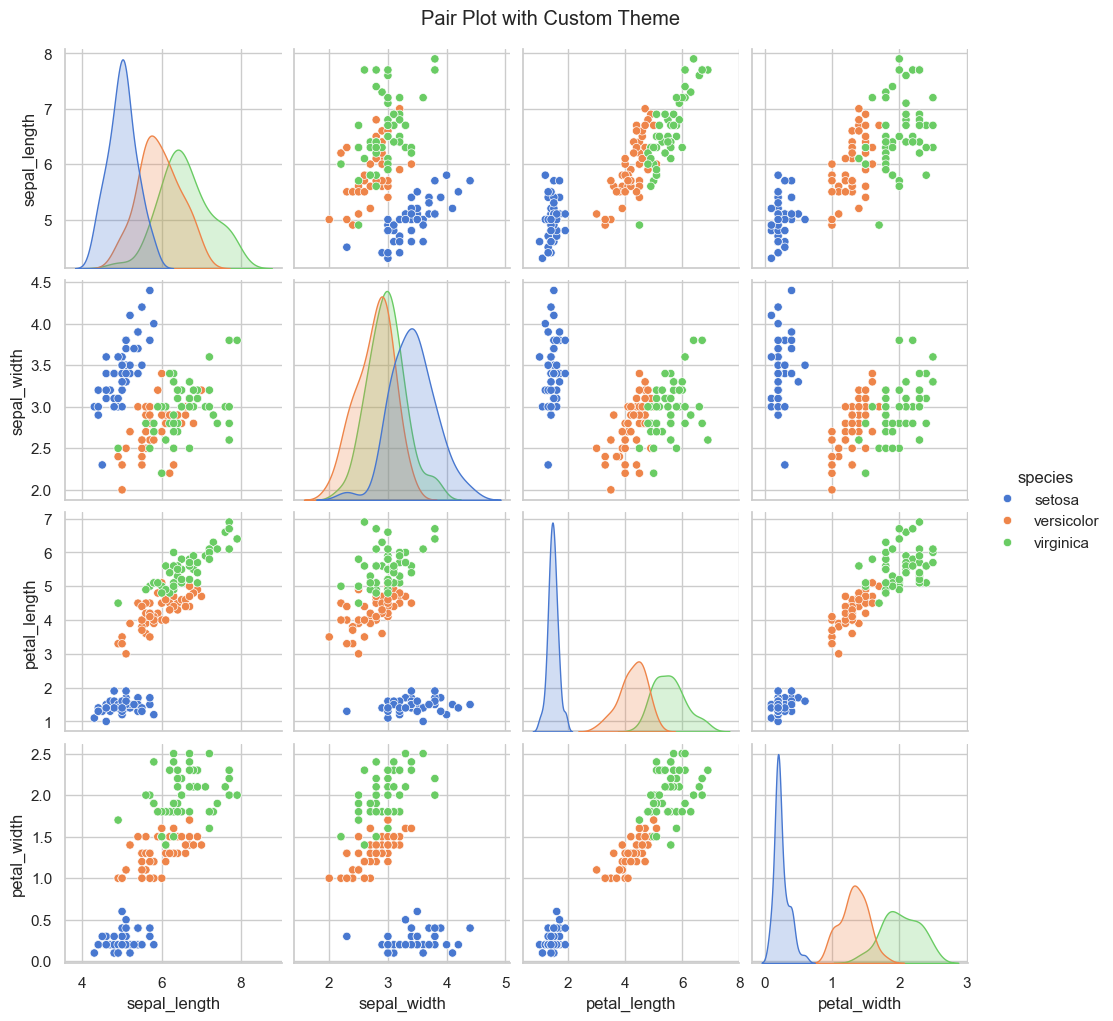

In [25]:
sns.set_theme(style='whitegrid', palette='muted')
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle('Pair Plot with Custom Theme', y=1.02)
plt.show()

- **sns.set_theme():** Sets a consistent style across all plots.

## Applications in Machine Learning
1. Feature Engineering:
>- Use the pair plot to identify redundant features or strong correlations.
For example, if sepal_length and petal_length are strongly correlated, you may drop one.

2. Class Imbalance:
>- Observe if certain classes dominate the feature space, which may require oversampling or undersampling.

3. Feature Selection:
>- Identify non-informative features with overlapping distributions or no significant correlation.

4. Clustering and Class Separation:
>- Use the pair plot to analyze whether clustering or classification is feasible. Overlapping points may indicate the need for non-linear models.

5. Outlier Detection:
>- Outliers are visually evident in scatterplots and can be removed or transformed.
---

# Next Steps
After mastering pair plots:

1. Advanced Plots for Detailed Analysis:
>- Use sns.jointplot for bivariate analysis.
>- Use sns.PairGrid for even more customization.

2. Feature Preprocessing:
>- Normalize, scale, or encode features for modeling.

3. Model Evaluation:
>- Use Seaborn plots like sns.heatmap for confusion matrices or residual plots for regression analysis.